<a href="https://colab.research.google.com/github/cantikacr/python/blob/main/Python_tugas_ke_14_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

Assigning a lambda fuction to convert **Number to Logaritimic**

In [ ]:
Ntl = lambda n: 10*np.log10(n)

Assigning a lambda function to convert **Logaritmic to Number**

In [ ]:
Ltn = lambda x: 10**(x/10)

Creating **PATHLOSS MODEL COST 231** Function

In [ ]:
def pathloss(fqcy,types,HT,HR,d):

  # If frequency is define by the range number in MHz then will result to assigned Ca and Cb values
  if fqcy in range(150,1501):
    Ca=69.55
    Cb=26.16
  elif fqcy in range(1501,2001):
    Ca=46.3
    Cb=33.9
  else:
    Ca = print("The frequency does not match the C1 criteria.")
    Cb = print("The frequency does not match the C2 criteria.")
    return Ca,Cb
  
  # Based on area type
  if types == 'urban' :
    cm=0
  elif types == 'suburban' :
    cm=-2*((np.log10((fqcy/28)**2))-5.4)
  elif types == 'open':
    cm=-4.78*(np.log10(fqcy))+18.33*(np.log10(fqcy))-40.94
  else:
    cm=print('The given area type(s) is not suitable for this parameter')
  

  aHR = (1.1*np.log10(fqcy)-0.7)*HR-(1.56*np.log10(fqcy)-1.8)

  # Calculating Path Loss Model
  Lp = Ca+(Cb*np.log10(fqcy))-(13.83*np.log10(HT))-aHR+((44.9-6.55*np.log10(HT))*np.log10(d))-cm
  return Lp

In [ ]:
# fqcy = frequency in range of 150 to 2000 MHz
# HT = height of antenna transmitter in range of 30 to 200 m
# HR = height of antenna receiver in range of 1 to 20 m
# types = type of area given
# d = distance between the transmitter and receiver in m

fqcy1=700 #Mhz
fqcy2=900 #Mhz
fqcy3=1800 #MHz
loc1='urban'
loc2='suburban'
loc3='open'
tower=80 #in m
user=1.5 #in m
dmin=300 #in m
dmax=1000 #in m
N=200 #dots
d=np.random.randint(dmin,dmax,N)

# Print the randon integer of Urban area distance input
print(d) 

[912 515 365 466 706 556 751 728 428 521 974 332 695 363 619 526 687 344
 824 505 378 792 340 484 650 555 628 622 821 598 548 444 897 836 721 984
 842 350 783 956 738 598 923 690 869 543 618 441 544 379 359 909 647 541
 791 937 913 615 586 671 820 442 813 489 941 581 766 451 538 853 831 956
 904 984 325 816 539 467 587 973 703 603 718 859 317 539 972 668 469 841
 997 994 441 672 496 987 838 880 928 402 885 563 607 619 985 440 788 508
 915 798 425 951 432 330 532 937 462 946 940 387 539 306 418 417 653 566
 939 587 554 651 668 953 694 799 536 464 611 363 726 341 562 624 660 740
 600 797 511 592 912 627 639 750 317 743 968 934 949 557 759 704 484 399
 619 563 332 941 887 897 635 843 733 885 334 345 901 523 446 449 854 384
 819 467 512 997 313 612 826 396 523 515 897 473 882 397 549 728 679 524
 876 841]


In [ ]:
# Define Pathloss Cost 231 Model for Area by the given input
LpUrban=pathloss(fqcy3,loc1,tower,user,d)
LpSubUrban=pathloss(fqcy3,loc2,tower,user,d)
LpOpen=pathloss(fqcy3,loc3,tower,user,d)

# Sort Distance for Area 
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSubUrban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

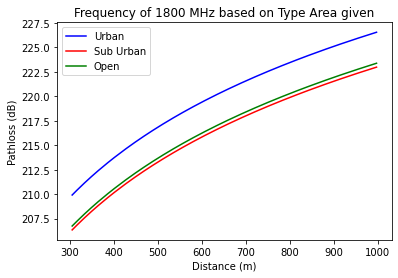

In [ ]:
fig, ax = plt.subplots()
ax.plot(d_sort,Urban_sort, color='b', label='Urban')
ax.plot(d_sort,Suburban_sort, color='r', label='Sub Urban')
ax.plot(d_sort,Open_sort, color='g', label='Open')
ax.set_title('Frequency of 1800 MHz based on Type Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Pathloss (dB)')
ax.legend(loc='upper left')
plt.show()

In [ ]:
# Define Pathloss Cost 231 Model for Frequency by the given input
LpUrbanFQcy1=pathloss(fqcy1,loc1,tower,user,d)
LpUrbanFQcy2=pathloss(fqcy2,loc1,tower,user,d)
LpUrbanFQcy3=pathloss(fqcy3,loc1,tower,user,d)

# Sort Distance for Area 
d_sort=d[np.argsort(d)]
UrbanFQcy_sort=LpUrbanFQcy1[np.argsort(d)]
UrbanFQcy2_sort=LpUrbanFQcy2[np.argsort(d)]
UrbanFQcy3_sort=LpUrbanFQcy3[np.argsort(d)]

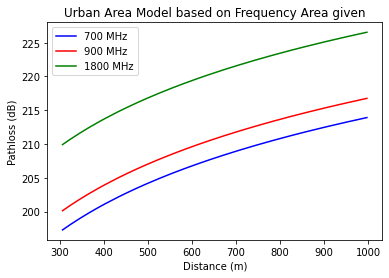

In [ ]:
fig, ax = plt.subplots()
ax.plot(d_sort,UrbanFQcy_sort, color='b', label='700 MHz')
ax.plot(d_sort,UrbanFQcy2_sort, color='r', label='900 MHz')
ax.plot(d_sort,UrbanFQcy3_sort, color='g', label='1800 MHz')
ax.set_title('Urban Area Model based on Frequency Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Pathloss (dB)')
ax.legend(loc='upper left')
plt.show()

Creating **Power Receive Model (Prx)** function

In [ ]:
def ValuePrX(PTX,Pl,Gtx,Grx):
  
  # Converting Transmitter Power from mW => dBm
  PtdB=Ntl(PTX)
  
  # Calculating the Value of PrX
  PrX=PtdB - Pl + Gtx + Grx

  # Converting Receiver Power from dBm => mW 
  PrXmW=Ltn(PrX)

  return PrXmW

In [ ]:
# tx = given transmitter power value
# pl = path loss value is derived from the prevoius calcultation model
# gtx = given transmitter gain value
# grx = given receiver gain value 

tx = 30000 #milliwatt
Pla = Urban_sort
Plb = Suburban_sort
Plc = Open_sort
Pld = UrbanFQcy_sort
Ple = UrbanFQcy2_sort
Plf = UrbanFQcy3_sort
gtx = 10 # dB
grx = 2 # dB

In [ ]:
# Define Receiver Power Model for Area by the given input
PrxUrban = ValuePrX(tx, Pla, gtx, grx)
PrxSubUrban = ValuePrX(tx, Plb, gtx, grx)
PrxOpen = ValuePrX(tx, Plc, gtx, grx)

# Define Receiver Power Model for Frequency by the given input
PrxUrban700  = ValuePrX(tx, Pld, gtx, grx)
PrxUrban900  = ValuePrX(tx, Ple, gtx, grx)
PrxUrban1800 = ValuePrX(tx, Plf, gtx, grx)

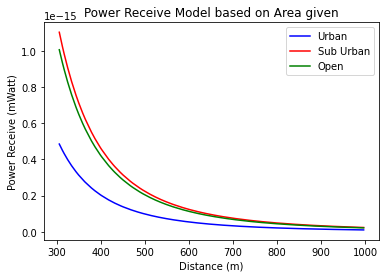

In [ ]:
fig, ax = plt.subplots()
ax.plot(d_sort,PrxUrban, color='b', label='Urban')
ax.plot(d_sort,PrxSubUrban, color='r', label='Sub Urban')
ax.plot(d_sort,PrxOpen, color='g', label='Open')
ax.set_title('Power Receive Model based on Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Power Receive (mWatt)')
ax.legend(loc='upper right')
plt.show()

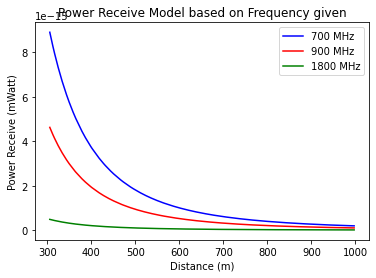

In [ ]:
fig, ax = plt.subplots()
ax.plot(d_sort,PrxUrban700, color='b', label='700 MHz')
ax.plot(d_sort,PrxUrban900, color='r', label='900 MHz')
ax.plot(d_sort,PrxUrban1800, color='g', label='1800 MHz')
ax.set_title('Power Receive Model based on Frequency given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Power Receive (mWatt)')
ax.legend(loc='upper right')
plt.show()

Creating **SNR** Model

In [ ]:
def SNRValue(PRX,BW):

  # Calculating No to BW
  No=-174+10*np.log10(BW)

  # Converting No in BW to Numeric
  NoW=Ltn(No)

  # Calculating SNR Value
  SNR= PRX/NoW

  return SNR

In [ ]:
# The Given Input of the SNR Model for Different Area and Frequency

# prx is receiver power value derived from the previous calculation value
# bw is the given bandwith value

Prx1 = PrxUrban
Prx2 = PrxSubUrban
Prx3 = PrxOpen
Prx4 = PrxUrban700
Prx5 = PrxUrban900
Prx6 = PrxUrban1800
BW   = 50000000

In [ ]:
# Define SNR Model for Area by the given input
SNRUrban = SNRValue(Prx1,BW)
SNRSubUrban = SNRValue(Prx2,BW)
SNROpen = SNRValue(Prx3,BW)

# Define SNR Model for Frequency by the given input
SNRUrban700 = SNRValue(Prx4,BW)
SNRUrban900 = SNRValue(Prx5,BW)
SNRUrban1800 = SNRValue(Prx6,BW)

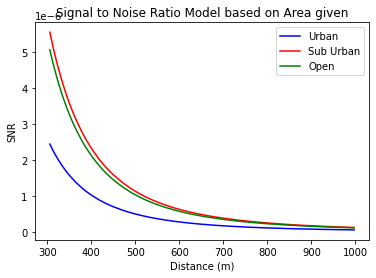

In [ ]:
fig, ax = plt.subplots()
ax.plot(d_sort,SNRUrban, color='b', label='Urban')
ax.plot(d_sort,SNRSubUrban, color='r', label='Sub Urban')
ax.plot(d_sort,SNROpen, color='g', label='Open')
ax.set_title('Signal to Noise Ratio Model based on Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('SNR')
ax.legend(loc='upper right')
plt.show()

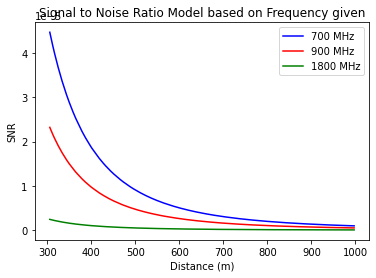

In [ ]:
fig, ax = plt.subplots()
ax.plot(d_sort,SNRUrban700, color='b', label='700 MHz')
ax.plot(d_sort,SNRUrban900, color='r', label='900 MHz')
ax.plot(d_sort,SNRUrban1800, color='g', label='1800 MHz')
ax.set_title('Signal to Noise Ratio Model based on Frequency given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('SNR')
ax.legend(loc='upper right')
plt.show()

Creating **Cell Capacity** Model

In [ ]:
# Calculating Cell Capacity
def Capacity(SNR,BW):
    
  Celcap = BW*np.log2(1+SNR)

  return Celcap

In [ ]:
# SNR = signal ==> noise ratio value derived from the previous calculation value
# BW = given bandwith value

SNR1 = SNRUrban 
SNR2 = SNRSubUrban
SNR3 = SNROpen
SNR4 = SNRUrban700
SNR5 = SNRUrban900
SNR6 = SNRUrban1800
BW   = 50000000

In [ ]:

celcapUrban = Capacity(SNR1, BW)
celcapSubUrban = Capacity(SNR2, BW)
celcapOpen = Capacity(SNR3, BW)

celcapUrban700 = Capacity(SNR4, BW)
celcapUrban900 = Capacity(SNR5, BW)
celcapUrban1800 = Capacity(SNR6, BW)

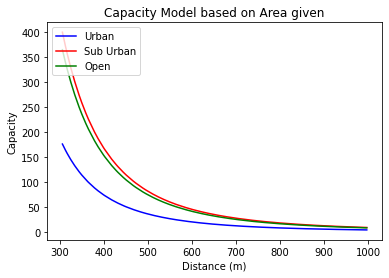

In [ ]:
fig, ax = plt.subplots()
ax.plot(d_sort,celcapUrban, color='b', label='Urban')
ax.plot(d_sort,celcapSubUrban, color='r', label='Sub Urban')
ax.plot(d_sort,celcapOpen, color='g', label='Open')
ax.set_title('Capacity Model based on Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Capacity')
ax.legend(loc='upper left')
plt.show()

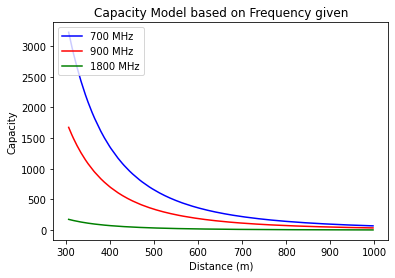

In [ ]:
fig, ax = plt.subplots()
ax.plot(d_sort,celcapUrban700, color='b', label='700 MHz')
ax.plot(d_sort,celcapUrban900, color='r', label='900 MHz')
ax.plot(d_sort,celcapUrban1800, color='g', label='1800 MHz')
ax.set_title('Capacity Model based on Frequency given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Capacity')
ax.legend(loc='upper left')
plt.show()